In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Importing the datasets into panda dataframes **

In [26]:
train=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
ss=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [27]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
#Separating the label into another dataframe
y_train1 = train['SalePrice']
#Combining train and test dataset for Data Wrangling
all_data = pd.concat([train, test], axis=0, sort=False)
#Dropping appropriate columns
all_data = all_data.drop(['Id', 'SalePrice'], axis=1)

In [30]:
#Creating a new feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [31]:
#Catagorical columns 
cat_cl=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','GarageQual','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']

In [32]:
#Encoding catagorical columns
from sklearn.preprocessing import LabelEncoder
for i in cat_cl:
    
    lb_make = LabelEncoder()
    all_data[i] = lb_make.fit_transform(all_data[i])
        

In [33]:
#Filling null values of catagorical features with modes of each columns
for i in cat_cl:
    
    all_data[i]=all_data[i].fillna(all_data[i].mode()[0])

In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   int64  
 8   Utilities      2919 non-null   int64  
 9   LotConfig      2919 non-null   int64  
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   int64  
 13  Condition2     2919 non-null   int64  
 14  BldgType       2919 non-null   int64  
 15  HouseStyle     2919 non-null   int64  
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

**Re-spliting the dataset into test and train**

In [35]:
x_train1 = all_data[:len(y_train1)]
x_test1 = all_data[len(y_train1):]

x_test1.shape , x_train1.shape

((1459, 80), (1460, 80))

In [36]:
# spearman correlation of SalePrice relative to the other integer attributes
train_corr = x_train1.join(y_train1)
train_corr_matrix = train_corr.corr(method='spearman')
# preselect features out of correlation threshold
prefeatures = train_corr_matrix[(train_corr_matrix['SalePrice']>0.1) | (train_corr_matrix['SalePrice']<-0.1)].index.tolist()
prefeatures.remove('SalePrice')
print(prefeatures)

['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SaleType', 'SaleCondition', 'TotalSF']


In [37]:
# drop intercorrelating features from prefeatures list
redundant_features = ['GrLivArea','TotalBsmtSF','GarageArea']
features = prefeatures
for element in redundant_features:
    features.remove(element)
print(features)


['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SaleType', 'SaleCondition', 'TotalSF']


In [38]:
#Dropping features with large missing values
x_train1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis =1,inplace=True)

x_test1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis =1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
#Filling missing values in continuous featues with 0
x_train1["LotFrontage"] = x_train1["LotFrontage"].fillna(0)
x_test1["LotFrontage"] = x_test1["LotFrontage"].fillna(0)
x_train1['GarageYrBlt'].replace(np.nan,0,inplace=True)
x_test1['GarageYrBlt'].replace(np.nan,0,inplace=True)
x_train1['MasVnrArea'].replace(np.nan,0,inplace=True)
x_test1['MasVnrArea'].replace(np.nan,0,inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [40]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [41]:
x_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   Utilities      1459 non-null   int64  
 8   LotConfig      1459 non-null   int64  
 9   LandSlope      1459 non-null   int64  
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   int64  
 12  Condition2     1459 non-null   int64  
 13  BldgType       1459 non-null   int64  
 14  HouseStyle     1459 non-null   int64  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [42]:
#Filling any missing values with zero
x_test1.fillna(0,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


# Applying Linear Regression on continuous values

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [44]:
Z = x_train1[['MasVnrArea','TotalSF','GarageArea','GarageYrBlt','YearBuilt','YearRemodAdd']]
#Applying log transformation on target
y = np.log(y_train1)

In [45]:
#Normalizing the Data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(Z)
test_df = scalar.fit_transform(x_test1[['MasVnrArea','TotalSF','GarageArea','GarageYrBlt','YearBuilt','YearRemodAdd']])

In [46]:
#Test_Train split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_train, y, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 146
number of training samples: 1314


In [47]:
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
lm.score(x_test,y_test)

0.8230292371358359

In [49]:
lm.fit(X_train,y)

LinearRegression()

In [50]:
#Prediction from continuous variable
kml=lm.predict(test_df)

In [51]:
for i in ['MasVnrArea','TotalSF','GarageYrBlt','YearBuilt','YearRemodAdd']:
    features.remove(i)


In [52]:
x_train1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,2566.0
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,2524.0
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,2706.0
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,2473.0
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,2600.0
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,3615.0
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,3492.0
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,2156.0


# Using KNN on Catagorical values

In [53]:
Z1=x_train1[features]
CX_train = scalar.fit_transform(Z1)
Ctest_df = scalar.fit_transform(x_test1[features])

In [54]:
xd_train, xd_test, yd_train, yd_test = train_test_split(CX_train,y, test_size = 0.2)


print("number of test samples :", xd_test.shape[0])
print("number of training samples:",xd_train.shape[0])

number of test samples : 292
number of training samples: 1168


In [55]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(xd_train, yd_train)  #fit the model
    pred=model.predict(xd_test) #make prediction on test set
    error = sqrt(mean_squared_error(yd_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.24621601420025988
RMSE value for k=  2 is: 0.218199057838279
RMSE value for k=  3 is: 0.20183440422226945
RMSE value for k=  4 is: 0.18996608104621163
RMSE value for k=  5 is: 0.18723810478374095
RMSE value for k=  6 is: 0.18409178146743413
RMSE value for k=  7 is: 0.18372134587170064
RMSE value for k=  8 is: 0.18499635033018444
RMSE value for k=  9 is: 0.18358523072800334
RMSE value for k=  10 is: 0.1839625771020449
RMSE value for k=  11 is: 0.18292049081297804
RMSE value for k=  12 is: 0.1823155759246636
RMSE value for k=  13 is: 0.18421922413613953
RMSE value for k=  14 is: 0.18421505147426936
RMSE value for k=  15 is: 0.18456035039934812
RMSE value for k=  16 is: 0.18620516672167103
RMSE value for k=  17 is: 0.18640467705381905
RMSE value for k=  18 is: 0.18737976287936683
RMSE value for k=  19 is: 0.18637373474261038
RMSE value for k=  20 is: 0.1872092599902851


<AxesSubplot:>

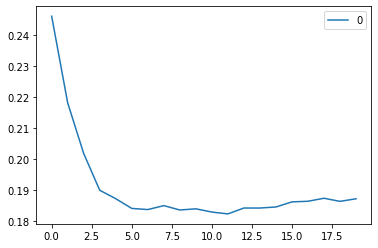

In [56]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [57]:
Kmodel = neighbors.KNeighborsRegressor(n_neighbors =4 )
Kmodel.fit(CX_train, y)  #fit the model
#Prediction from catagorical values
Mainpred=Kmodel.predict(Ctest_df)

# Using XG boost regression on continuous features

In [58]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=4
)

In [59]:
regressor.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
#Prediction using XG Boost
rpred=regressor.predict(test_df)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


# Using Random Forest Regression on Continuous features

In [61]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y)
forest_reg= rf.predict(test_df)

# For Catagorical Features

In [62]:
rf.fit(CX_train,y)
forest_cat = rf.predict(Ctest_df)

In [63]:
#average of prediction from regression values
reg_av=(kml+forest_reg+rpred)/3

In [64]:
#average of prediction from catagorical values
cat_av=(forest_cat+Mainpred)/2

In [65]:
#Using anti log transformation
av_reg=np.exp(reg_av)
av_cat=np.exp(cat_av)

In [66]:
avg=(av_reg+av_cat)/2

In [67]:
ss['SalePrice']=avg

In [68]:
ss.to_csv('submission.csv',index=False)